In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid", context="talk")
pd.set_option('display.max_columns', 200)

In [11]:
df=pd.read_csv("../finale.csv")

In [12]:
df=df.drop(columns=["Unnamed: 0"])

In [13]:
df.head()

,adc.100.championId,adc.100.spell1Id,adc.100.spell2Id,adc.100.stats.kills,adc.100.stats.deaths,adc.100.stats.assists,adc.100.stats.largestKillingSpree,adc.100.stats.largestMultiKill,adc.100.stats.killingSprees,adc.100.stats.longestTimeSpentLiving,adc.100.stats.doubleKills,adc.100.stats.tripleKills,adc.100.stats.quadraKills,adc.100.stats.pentaKills,adc.100.stats.totalDamageDealt,adc.100.stats.magicDamageDealt,adc.100.stats.physicalDamageDealt,adc.100.stats.trueDamageDealt,adc.100.stats.largestCriticalStrike,adc.100.stats.totalDamageDealtToChampions,adc.100.stats.magicDamageDealtToChampions,adc.100.stats.physicalDamageDealtToChampions,adc.100.stats.trueDamageDealtToChampions,adc.100.stats.totalHeal,adc.100.stats.totalUnitsHealed,adc.100.stats.damageSelfMitigated,adc.100.stats.damageDealtToObjectives,adc.100.stats.damageDealtToTurrets,adc.100.stats.visionScore,adc.100.stats.timeCCingOthers,adc.100.stats.totalDamageTaken,adc.100.stats.magicalDamageTaken,adc.100.stats.physicalDamageTaken,adc.100.stats.trueDamageTaken,adc.100.stats.goldEarned,adc.100.stats.goldSpent,adc.100.stats.turretKills,adc.100.stats.inhibitorKills,adc.100.stats.totalMinionsKilled,adc.100.stats.neutralMinionsKilled,adc.100.stats.neutralMinionsKilledTeamJungle,adc.100.stats.neutralMinionsKilledEnemyJungle,adc.100.stats.totalTimeCrowdControlDealt,adc.100.stats.champLevel,adc.100.stats.visionWardsBoughtInGame,adc.100.stats.wardsPlaced,adc.100.stats.wardsKilled,adc.100.stats.firstBloodKill,adc.100.stats.firstBloodAssist,adc.100.stats.firstTowerKill,adc.100.stats.firstTowerAssist,adc.100.stats.firstInhibitorKill,adc.100.stats.firstInhibitorAssist,adc.100.timeline.role,adc.100.timeline.lane,adc.100.position,adc.200.championId,adc.200.spell1Id,adc.200.spell2Id,adc.200.stats.kills,adc.200.stats.deaths,adc.200.stats.assists,adc.200.stats.largestKillingSpree,adc.200.stats.largestMultiKill,adc.200.stats.killingSprees,adc.200.stats.longestTimeSpentLiving,adc.200.stats.doubleKills,adc.200.stats.tripleKills,adc.200.stats.quadraKills,adc.200.stats.pentaKills,adc.200.stats.totalDamageDealt,adc.200.stats.magicDamageDealt,adc.200.stats.physicalDamageDealt,adc.200.stats.trueDamageDealt,adc.200.stats.largestCriticalStrike,adc.200.stats.totalDamageDealtToChampions,adc.200.stats.magicDamageDealtToChampions,adc.200.stats.physicalDamageDealtToChampions,adc.200.stats.trueDamageDealtToChampions,adc.200.stats.totalHeal,adc.200.stats.totalUnitsHealed,adc.200.stats.damageSelfMitigated,adc.200.stats.damageDealtToObjectives,adc.200.stats.damageDealtToTurrets,adc.200.stats.visionScore,adc.200.stats.timeCCingOthers,adc.200.stats.totalDamageTaken,adc.200.stats.magicalDamageTaken,adc.200.stats.physicalDamageTaken,adc.200.stats.trueDamageTaken,adc.200.stats.goldEarned,adc.200.stats.goldSpent,adc.200.stats.turretKills,adc.200.stats.inhibitorKills,adc.200.stats.totalMinionsKilled,adc.200.stats.neutralMinionsKilled,adc.200.stats.neutralMinionsKilledTeamJungle,adc.200.stats.neutralMinionsKilledEnemyJungle,adc.200.stats.totalTimeCrowdControlDealt,adc.200.stats.champLevel,...,top.100.stats.totalHeal,top.100.stats.totalUnitsHealed,top.100.stats.damageSelfMitigated,top.100.stats.damageDealtToObjectives,top.100.stats.damageDealtToTurrets,top.100.stats.visionScore,top.100.stats.timeCCingOthers,top.100.stats.totalDamageTaken,top.100.stats.magicalDamageTaken,top.100.stats.physicalDamageTaken,top.100.stats.trueDamageTaken,top.100.stats.goldEarned,top.100.stats.goldSpent,top.100.stats.turretKills,top.100.stats.inhibitorKills,top.100.stats.totalMinionsKilled,top.100.stats.neutralMinionsKilled,top.100.stats.neutralMinionsKilledTeamJungle,top.100.stats.neutralMinionsKilledEnemyJungle,top.100.stats.totalTimeCrowdControlDealt,top.100.stats.champLevel,top.100.stats.visionWardsBoughtInGame,top.100.stats.wardsPlaced,top.100.stats.wardsKilled,top.100.stats.firstBloodKill,top.100.stats.firstBloodAssist,top.100.stats.firstTowerKill,top.100.stats.firstTowerAssist,top.100.stats.firstInhibitorKill,top.100.stats.firstInhibit

In [14]:
cont=['adc.100.stats.largestKillingSpree',
 'adc.100.stats.damageDealtToObjectives',
 'adc.100.stats.damageDealtToTurrets',
 'adc.100.stats.turretKills',
 'adc.100.stats.inhibitorKills',
 'adc.200.stats.largestKillingSpree',
 'adc.200.stats.damageDealtToObjectives',
 'adc.200.stats.damageDealtToTurrets',
 'adc.200.stats.turretKills',
 'adc.200.stats.inhibitorKills',
 'jungle.100.stats.deaths',
 'jungle.100.stats.damageDealtToObjectives',
 'jungle.100.stats.damageDealtToTurrets',
 'jungle.100.stats.turretKills',
 'jungle.100.stats.neutralMinionsKilledEnemyJungle',
 'jungle.200.stats.deaths',
 'jungle.200.stats.damageDealtToObjectives',
 'jungle.200.stats.damageDealtToTurrets',
 'jungle.200.stats.turretKills',
 'mid.100.stats.deaths',
 'mid.100.stats.damageDealtToObjectives',
 'mid.100.stats.damageDealtToTurrets',
 'mid.100.stats.turretKills',
 'mid.200.stats.damageDealtToObjectives',
 'mid.200.stats.damageDealtToTurrets',
 'mid.200.stats.turretKills',
 'support.100.stats.deaths',
 'support.100.stats.assists',
 'support.100.stats.damageDealtToObjectives',
 'support.100.stats.damageDealtToTurrets',
 'support.200.stats.assists',
 'support.200.stats.damageDealtToObjectives',
 'support.200.stats.damageDealtToTurrets',
 'top.100.stats.damageDealtToObjectives',
 'top.100.stats.damageDealtToTurrets',
 'top.100.stats.turretKills',
 'top.200.stats.deaths',
 'top.200.stats.damageDealtToObjectives',
 'top.200.stats.damageDealtToTurrets',
 'top.200.stats.turretKills']

In [15]:
def missingsPercentages(df):
  percentageOfMiss=[]
  for i in df.columns.values:
    miss=[i,df[i].isnull().sum()/df.shape[0]*100]
    percentageOfMiss.append(miss)
  return pd.DataFrame(percentageOfMiss,columns=['feat','missings%']).sort_values('missings%',ascending=0).reset_index(drop=True)

In [16]:
missingsPercentages(df[cont])

,feat,missings%
0,adc.100.stats.largestKillingSpree,0.0
1,adc.100.stats.damageDealtToObjectives,0.0
2,mid.100.stats.turretKills,0.0
3,mid.200.stats.damageDealtToObjectives,0.0
4,mid.200.stats.damageDealtToTurrets,0.0
5,mid.200.stats.turretKills,0.0
6,support.100.stats.deaths,0.0
7,support.100.stats.assists,0.0
8,support.100.stats.damageDealtToObjectives,0.0
9,support.100.stats.damageDealtToTurrets,0.0


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [18]:
km = KMeans(n_clusters=10,max_iter=len(df[cont])*2)
mms = MinMaxScaler()

In [19]:
X = df[cont].copy()

In [20]:
mms.fit(X)

MinMaxScaler()

In [21]:
Xs = pd.DataFrame(mms.transform(X),columns=cont)

In [22]:
%%time
km.fit(Xs)

CPU times: user 8.59 s, sys: 910 ms, total: 9.5 s
Wall time: 2.82 s


KMeans(max_iter=38472, n_clusters=10)

In [23]:
from sklearn.feature_selection import SelectKBest

In [24]:
sk = SelectKBest(k=7)

In [25]:
sk.fit(Xs,km.predict(Xs))

SelectKBest(k=7)

In [26]:
best = [a for a,b in zip(X.columns,sk.get_support()) if b]

In [27]:
best

['adc.100.stats.damageDealtToObjectives',
 'adc.100.stats.damageDealtToTurrets',
 'adc.200.stats.damageDealtToObjectives',
 'adc.200.stats.damageDealtToTurrets',
 'support.200.stats.assists',
 'top.100.stats.damageDealtToTurrets',
 'top.100.stats.turretKills']

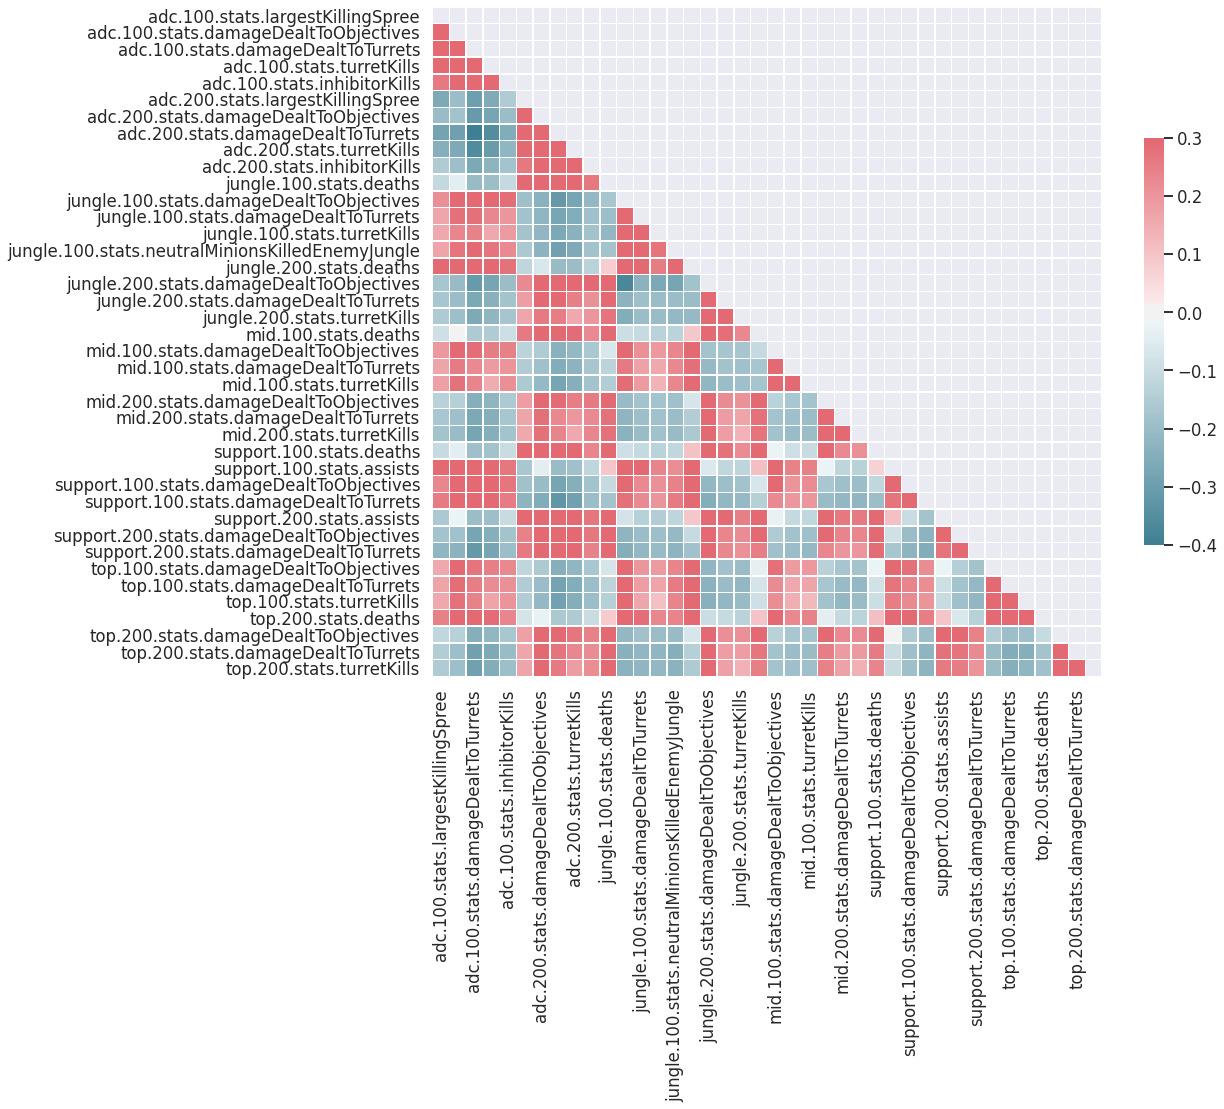

In [30]:
# Compute the correlation matrix
corr = df[cont].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Cluster

In [31]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE

In [32]:
mms = MinMaxScaler()
sts = StandardScaler()

In [33]:
X=df[cont]

In [34]:
mms.fit(X)
sts.fit(X)

StandardScaler()

In [35]:
Xmini=X.sample(frac=.05)

In [36]:
Xmini.shape

(962, 40)

In [38]:
Xs = pd.DataFrame(sts.transform(Xmini),columns = cont)

In [39]:
Xm = pd.DataFrame(mms.transform(Xmini),columns = cont)

In [40]:
pca = PCA(n_components=2)
pca.fit(Xs)
pca.explained_variance_ratio_.cumsum()

array([0.26529905, 0.373798  ])

In [41]:
mds = MDS(n_components=2,n_jobs=-1)
tsne =TSNE(n_components=2,n_jobs=-1)

In [42]:
%%time
xmds = pd.DataFrame(mds.fit_transform(Xmini),columns=['d1','d2'])
xtsn = pd.DataFrame(tsne.fit_transform(Xmini),columns=['d1','d2'])
#pca = pd.DataFrame(pca.fit_transform(X),columns=['p1','p2'])

CPU times: user 9.51 s, sys: 88.6 ms, total: 9.6 s
Wall time: 25.2 s


In [43]:
#sns.lmplot(data=pca,x='p1',y='p2',fit_reg=False)

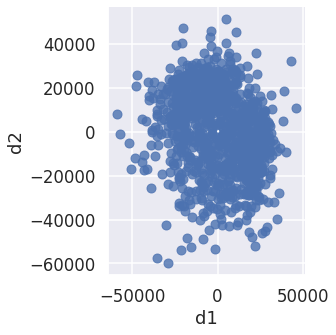

In [44]:
sns.lmplot(data=xmds,x='d1',y='d2',fit_reg=False)

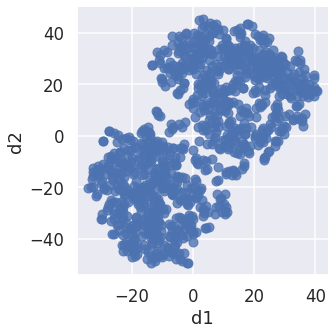

In [45]:
sns.lmplot(data=xtsn,x='d1',y='d2',fit_reg=False)

In [46]:
l_in = []
for k in range(2,10):
    km = KMeans(n_clusters=k,max_iter=len(X))
    km.fit(X)
    l_in.append(km.inertia_)

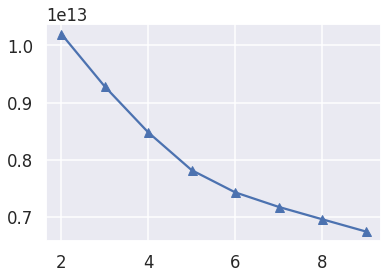

In [47]:
plt.plot(range(2,10),l_in,marker='^')

In [48]:
km = KMeans(n_clusters=5,max_iter=len(X)*2)
gm = GaussianMixture(n_components=5,max_iter=len(X)*2)

In [52]:
km.fit(Xmini)

KMeans(max_iter=38472, n_clusters=5)

In [53]:
gm.fit(Xmini)

GaussianMixture(max_iter=38472, n_components=5)

In [54]:
xmds['gm'] = gm.predict(Xmini)
xmds['km'] = km.predict(Xmini)

xtsn['gm'] = gm.predict(Xmini)
xtsn['km'] = km.predict(Xmini)

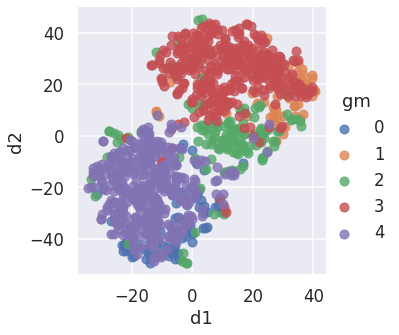

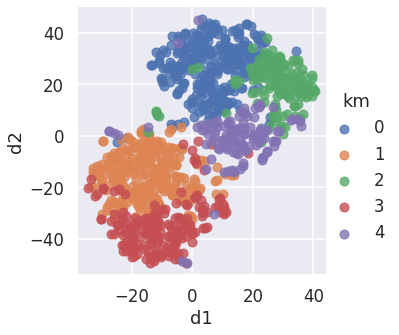

In [55]:
sns.lmplot(data=xtsn,x='d1',y='d2',fit_reg=False,hue='gm')
sns.lmplot(data=xtsn,x='d1',y='d2',fit_reg=False,hue='km')

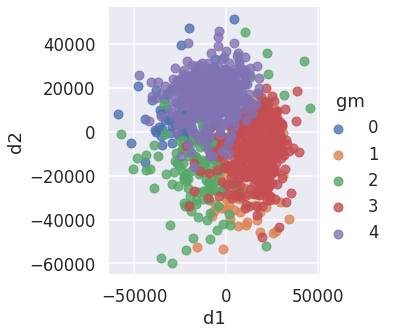

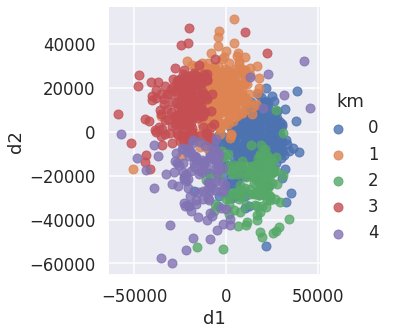

In [56]:
sns.lmplot(data=xmds,x='d1',y='d2',fit_reg=False,hue='gm')
sns.lmplot(data=xmds,x='d1',y='d2',fit_reg=False,hue='km')

In [58]:
X["cluster"]=km.predict(X[cont])

<ipython-input-58-ef5a62e8d323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"]=km.predict(X[cont])


In [62]:
clusters=X[cont+["cluster"]].groupby('cluster').mean().T

In [79]:
clusters

cluster,0,1,2,3,4
adc.100.stats.largestKillingSpree,2.106282,4.564994,2.360203,3.997550,4.334062
adc.100.stats.damageDealtToObjectives,4382.439747,14708.012446,4922.381784,15631.098802,19952.148229
adc.100.stats.damageDealtToTurrets,2087.788621,6769.961478,2330.540781,6239.098802,6191.966769
adc.100.stats.turretKills,0.512643,2.178783,0.598223,2.071040,1.950153
adc.100.stats.inhibitorKills,0.027262,0.460490,0.039353,0.517964,0.426760
adc.200.stats.largestKillingSpree,4.532991,1.952390,4.036179,2.496734,4.056843
adc.200.stats.damageDealtToObjectives,16215.884433,3730.162584,14971.971120,5707.763473,19966.095321
adc.200.stats.damageDealtToTurrets,6912.217503,1873.534571,6195.046334,2592.151606,5874.947092
adc.200.stats.turretKills,2.224812,0.430857,2.028562,0.675830,1.841714
adc.200.stats.inhibitorKills,0.451403,0.016397,0.497937,0.049809,0.409707


In [78]:
X[cont].mean().to_frame().T

,adc.100.stats.largestKillingSpree,adc.100.stats.damageDealtToObjectives,adc.100.stats.damageDealtToTurrets,adc.100.stats.turretKills,adc.100.stats.inhibitorKills,adc.200.stats.largestKillingSpree,adc.200.stats.damageDealtToObjectives,adc.200.stats.damageDealtToTurrets,adc.200.stats.turretKills,adc.200.stats.inhibitorKills,jungle.100.stats.deaths,jungle.100.stats.damageDealtToObjectives,jungle.100.stats.damageDealtToTurrets,jungle.100.stats.turretKills,jungle.100.stats.neutralMinionsKilledEnemyJungle,jungle.200.stats.deaths,jungle.200.stats.damageDealtToObjectives,jungle.200.stats.damageDealtToTurrets,jungle.200.stats.turretKills,mid.100.stats.deaths,mid.100.stats.damageDealtToObjectives,mid.100.stats.damageDealtToTurrets,mid.100.stats.turretKills,mid.200.stats.damageDealtToObjectives,mid.200.stats.damageDealtToTurrets,mid.200.stats.turretKills,support.100.stats.deaths,support.100.stats.assists,support.100.stats.damageDealtToObjectives,support.100.stats.damageDealtToTurrets,support.200.stats.assists,support.200.stats.damageDealtToObjectives,support.200.stats.damageDealtToTurrets,top.100.stats.damageDealtToObjectives,top.100.stats.damageDealtToTurrets,top.100.stats.turretKills,top.200.stats.deaths,top.200.stats.damageDealtToObjectives,top.200.stats.damageDealtToTurrets,top.200.stats.turretKills
0,3.420981,11187.643689,4640.514764,1.433666,0.284467,3.326991,11165.333437,4520.359586,1.379185,0.262892,6.171033,19348.92696,1773.628093,0.799127,7.999688,6.160636,18852.716833,1727.747921,0.773965,5.997453,6500.420618,3300.557756,0.944323,6654.466417,3250.659389,0.924153,5.970264,12.661416,3101.350697,1485.654658,12.623051,3106.76492,1438.927116,8614.985756,4498.485548,1.421345,5.708047,8691.966157,4427.350021,1.39083


## Pruebas de significancia

In [65]:
from scipy.stats import kruskal

In [69]:
l_p=[]
for i in cont:
    arr=[]
    for j in range(4):
        arr.append(X.loc[X.cluster==j][i].to_list())
    kr=kruskal(*arr)
    l_p.append((i,kr.pvalue))

In [70]:
df_sig = pd.DataFrame(l_p,columns=['variable','p-value'])
df_sig['p-value'] = df_sig['p-value'].map(lambda x:round(x,6))

In [71]:
df_sig

,variable,p-value
0,adc.100.stats.largestKillingSpree,0.0
1,adc.100.stats.damageDealtToObjectives,0.0
2,adc.100.stats.damageDealtToTurrets,0.0
3,adc.100.stats.turretKills,0.0
4,adc.100.stats.inhibitorKills,0.0
5,adc.200.stats.largestKillingSpree,0.0
6,adc.200.stats.damageDealtToObjectives,0.0
7,adc.200.stats.damageDealtToTurrets,0.0
8,adc.200.stats.turretKills,0.0
9,adc.200.stats.inhibitorKills,0.0


In [72]:
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import chisquare

In [73]:
for v in df_sig['variable']:
    print(v)
    mc = MultiComparison(X[v],X['cluster'])
    print(mc.tukeyhsd().summary())
    print('\n')

adc.100.stats.largestKillingSpree
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   2.4587  0.001  2.3264   2.591   True
     0      2   0.2539  0.001  0.1029  0.4049   True
     0      3   1.8913  0.001   1.747  2.0355   True
     0      4   2.2278  0.001  2.0601  2.3955   True
     1      2  -2.2048  0.001 -2.3558 -2.0538   True
     1      3  -0.5674  0.001 -0.7117 -0.4232   True
     1      4  -0.2309 0.0016 -0.3986 -0.0633   True
     2      3   1.6373  0.001  1.4758  1.7989   True
     2      4   1.9739  0.001   1.791  2.1567   True
     3      4   0.3365  0.001  0.1593  0.5138   True
----------------------------------------------------


adc.100.stats.damageDealtToObjectives
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     0      1  1474.2388  0.001  1378.9831  1569.4946   True
     0      2    40.8759 0.8234   -67.8674   149.6193  False
     0      3  2631.9218  0.001  2528.0583  2735.7853   True
     0      4  1431.7956  0.001  1311.0539  1552.5372   True
     1      2 -1433.3629  0.001 -1542.1063 -1324.6195   True
     1      3   1157.683  0.001  1053.8195  1261.5465   True
     1      4   -42.4433 0.8611  -163.1849    78.2984  False
     2      3  2591.0459  0.001  2474.6883  2707.4035   True
     2      4  1390.9196  0.001  1259.2761  1522.5632   True
     3      4 -1200.1262  0.001 -1327.7684 -1072.4841   True
------------------------------------------------------------


jungle.100.stats.turretKills
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
---------

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     0      1 -3297.2454  0.001  -3459.637 -3134.8537   True
     0      2  -114.6158 0.4439  -300.0012    70.7696  False
     0      3 -2762.0042  0.001 -2939.0704 -2584.9381   True
     0      4  -652.7338  0.001  -858.5739  -446.8938   True
     1      2  3182.6296  0.001  2997.2442   3368.015   True
     1      3   535.2411  0.001    358.175   712.3073   True
     1      4  2644.5115  0.001  2438.6715  2850.3516   True
     2      3 -2647.3884  0.001 -2845.7545 -2449.0224   True
     2      4   -538.118  0.001  -762.5435  -313.6926   True
     3      4  2109.2704  0.001  1891.6665  2326.8743   True
------------------------------------------------------------


mid.200.stats.turretKills
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
--------------

In [74]:
import pickle


In [75]:
filename = 'todospartidas.pickle'
pickle.dump(km, open(filename, 'wb'))